In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
click_dat = pd.read_csv('click.csv')

In [3]:
click_dat.head()

,x,y
0,235,591
1,216,539
2,148,413
3,35,310
4,85,308


In [4]:
train_y = click_dat.y

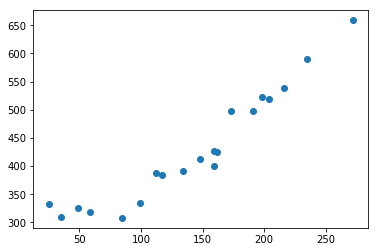

In [5]:
plt.plot(click_dat['x'], click_dat['y'], 'o')

## 2.2 1次関数として実装

In [6]:
theta0 = np.random.rand()
theta1 = np.random.rand()
def f(x):
    return theta0 + theta1 * x
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

In [7]:
# standardize
mu = click_dat['x'].mean()
sigma = click_dat['x'].std()
def standardize(x):
    return (x - mu) / sigma
train_z = standardize(click_dat.x)

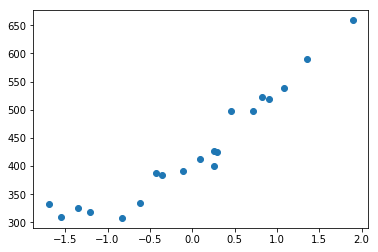

In [8]:
plt.plot(train_z, click_dat.y, 'o')

In [9]:
# update param 

ETA = 1e-3

# 誤算の差分
diff = 1

# 更新回数
count = 0

# 学習を繰り返す
error = E(train_z, click_dat.y)

while diff > 1e-3:
    tmp0 = theta0 - ETA * np.sum(f(train_z) - click_dat.y)
    tmp1 = theta1 - ETA * np.sum((f(train_z) - click_dat.y) * train_z)
    
    theta0 = tmp0
    theta1 = tmp1
    
    current_error = E(train_z, click_dat.y)
    diff = error - current_error
    error = current_error
    
    count += 1
    log = '{}回目： theta0 = {:.3f}, theta1 = {:.3f}, diff = {:.4f}'
    print(log.format(count, theta0, theta1, diff))

1回目： theta0 = 9.557, theta1 = 2.536, diff = 75832.9811
2回目： theta0 = 17.949, theta1 = 4.310, diff = 72836.3473
3回目： theta0 = 26.173, theta1 = 6.050, diff = 69958.1411
4回目： theta0 = 34.233, theta1 = 7.758, diff = 67193.6818
5回目： theta0 = 42.131, theta1 = 9.433, diff = 64538.4736
6回目： theta0 = 49.871, theta1 = 11.076, diff = 61988.1986
7回目： theta0 = 57.457, theta1 = 12.687, diff = 59538.7093
8回目： theta0 = 64.891, theta1 = 14.269, diff = 57186.0225
9回目： theta0 = 72.176, theta1 = 15.820, diff = 54926.3122
10回目： theta0 = 79.316, theta1 = 17.341, diff = 52755.9036
11回目： theta0 = 86.312, theta1 = 18.834, diff = 50671.2673
12回目： theta0 = 93.169, theta1 = 20.298, diff = 48669.0133
13回目： theta0 = 99.889, theta1 = 21.735, diff = 46745.8857
14回目： theta0 = 106.474, theta1 = 23.144, diff = 44898.7571
15回目： theta0 = 112.927, theta1 = 24.527, diff = 43124.6240
16回目： theta0 = 119.252, theta1 = 25.883, diff = 41420.6013
17回目： theta0 = 125.450, theta1 = 27.214, diff = 39783.9182
18回目： theta0 = 131.524, t

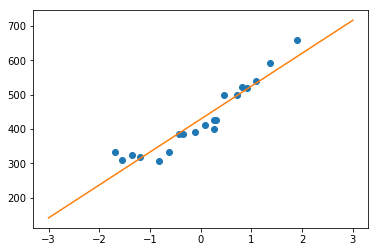

In [10]:
x = np.linspace(-3, 3, 100)
plt.plot(train_z, click_dat.y, 'o')
plt.plot(x, f(x))

## 2.4 多項式回帰の実装
$$
f_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2
$$

In [11]:
theta = np.random.rand(3)

# train data to matrix
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x ** 2]).T

X = to_matrix(train_z)

# pred func
def f(x):
    return np.dot(x, theta)

# diff error
diff = 1

# loop learn
error = E(X, click_dat.y)
while diff > 1e-2:
    theta = theta - ETA * np.dot(f(X) - click_dat.y, X)
    
    current_error = E(X, click_dat.y)
    diff = error - current_error
    error = current_error
    print('theta:{}, diff : {}'.format(theta, diff))



theta:[ 8.59004248  2.71798244  8.98067644], diff : 145952.7716270038
theta:[ 16.83060878   4.5001127   17.01371929], diff : 132395.43235039315
theta:[ 24.75373594   6.25870056  24.57661669], diff : 120162.9047763655
theta:[ 32.3747055    7.99358946  31.69385614], diff : 109124.13015504694
theta:[ 39.70802812   9.70465724  38.3886717 ], diff : 99161.05870562163
theta:[ 46.7674828   11.39181391  44.68310802], diff : 90167.3569705193
theta:[ 53.56615409  13.05499953  50.59808101], diff : 82047.24366108538
theta:[ 60.11646747  14.69418214  56.15343548], diff : 74714.44122076314
theta:[ 66.43022285  16.30935588  61.3679998 ], diff : 68091.23160177725
theta:[ 72.51862639  17.90053919  66.25963779], diff : 62107.60589505627
theta:[ 78.39232075  19.4677731   70.84529796], diff : 56700.49848312407
theta:[ 84.06141367  21.01111965  75.14106025], diff : 51813.09731331782
theta:[ 89.53550525  22.53066032  79.16218036], diff : 47394.22272405273
theta:[ 94.82371372  24.02649466  82.92313181], diff 

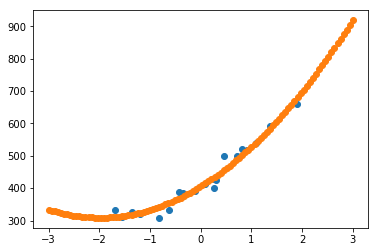

In [12]:
x = np.linspace(-3, 3, 100)
plt.plot(train_z, click_dat.y, 'o')
plt.plot(x, f(to_matrix(x)), 'o')

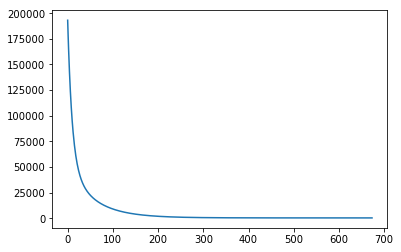

In [13]:
# MSE : mean square error
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

theta = np.random.rand(3)

# MSEの履歴
errors = []

diff = 1

errors.append(MSE(X, click_dat.y))
while diff > 1e-2:
    theta = theta - ETA * np.dot(f(X) - click_dat.y, X)
    errors.append(MSE(X, click_dat.y))
    diff = errors[-2] - errors[-1]
    
# plot error
x = np.arange(len(errors))
plt.plot(x, errors)

## 2.5 確率的勾配降下法の実装


# 3. パーセプトロン

In [14]:
train = np.loadtxt('images1.csv', delimiter=',', skiprows=1)
train_x = train[:, 0:2]
train_y = train[:, 2]

In [15]:
train_y

array([-1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
        1., -1., -1.,  1., -1., -1.,  1.])

In [16]:
train_y == 1


array([False, False, False,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True, False, False,  True, False,
       False,  True], dtype=bool)

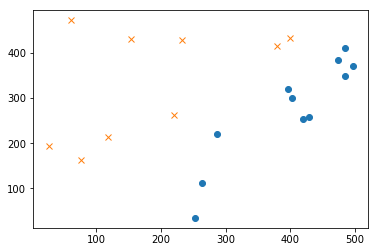

In [17]:
plt.plot(train_x[train_y == 1, 0], train_x[train_y == 1, 1], 'o')
plt.plot(train_x[train_y == -1, 0], train_x[train_y == -1, 1], 'x')



## 3.1 パーセプトロンの実装
$$
f_{\bf w}({\bf x}) = \begin{cases}
    1 & ({\bf w} \cdot {\bf x} \geq 0 ) \\
    -1 & ({\bf w} \cdot {\bf x} < 0)
  \end{cases}
$$


In [18]:
# init weight
w = np.random.rand(2)

# discriminator func
def f(x):
    if np.dot(w, x) >= 0:
        return 1
    else:
        return -1
    


-  update param
$$
{\bf w} := \begin{cases}
    {\bf w} + y^{(i)} {\bf x}^{(i)})  & (f_{\bf w}({\bf x^{(i)}} \neq y^{(i)})) \\
    {\bf w}       & (f_{\bf w}({\bf x^{(i)}} = y^{(i)}))
    \end{cases}
$$

In [19]:
epoch = 10
count = 0
for _ in range(epoch):
    for x, y in zip(train_x, train_y):
        if f(x) != y:
            w = w + y * x
            count += 1
            print('count : {}, w = {}'.format(count, w))

count : 1, w = [-152.95985412 -431.47122277]
count : 2, w = [ 321.04014588  -47.47122277]
count : 3, w = [  88.04014588 -477.47122277]
count : 4, w = [ 484.04014588 -156.47122277]
count : 5, w = [  85.04014588 -589.47122277]
count : 6, w = [ 488.04014588 -289.47122277]
count : 7, w = [ 109.04014588 -705.47122277]
count : 8, w = [ 372.04014588 -593.47122277]
count : 9, w = [ 846.04014588 -209.47122277]
count : 10, w = [ 613.04014588 -639.47122277]


- 重み $w$ を法線ベクトルとする直線の方程式
$${\bf w \cdot x} = w_1 x_1 + w_2 x_2 = 0$$
$$ x_2 = - \frac{w_1}{w_2}x_1 $$

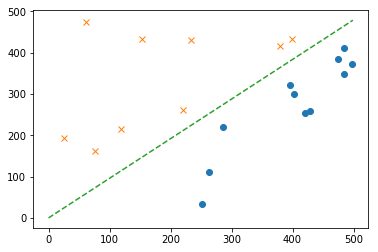

In [20]:
x1 = np.arange(0,500)
plt.plot(train_x[train_y == 1, 0], train_x[train_y == 1, 1], 'o')
plt.plot(train_x[train_y == -1, 0], train_x[train_y == -1, 1], 'x')
plt.plot(x1, (-w[0] / w[1]) * x1 ,linestyle = 'dashed')

In [21]:
# 未知データで分類
f([200,100])

1

In [22]:
f([100,200])

-1

- ただし、線形分離可能でしか解けないので注意
  - 解きたいときはどうするんだろう？

# 4. ロジスティック回帰

In [23]:
train = np.loadtxt('images2.csv', delimiter=',', skiprows=1)
train_x = train[:, 0:2]
train_y = train[:, 2]

In [24]:
theta = np.random.rand(3)

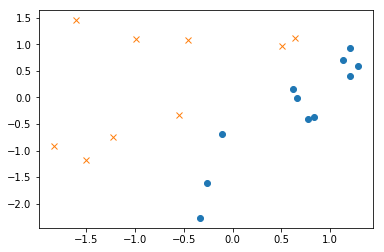

In [25]:
mu = train_x.mean(axis=0)
sigma = train_x.std(axis=0)
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)
    
def to_matrix(x):
    x0 = np.ones([x.shape[0], 1])
    return np.hstack([x0, x])

X = to_matrix(train_z)

plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')



## 4.1 ロジスティック回帰の実装

In [26]:
# sigmoid
def f(x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))

In [27]:
ETA = 1e-3
epoch = 5000
for _ in range(epoch):
    theta = theta - ETA * np.dot(f(X) - train_y, X)

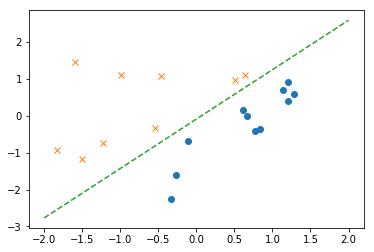

In [28]:
x0 = np.linspace(-2, 2, 100)
plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')

plt.plot(x0, -(theta[0] + theta[1] * x0) / theta[2], linestyle = 'dashed')

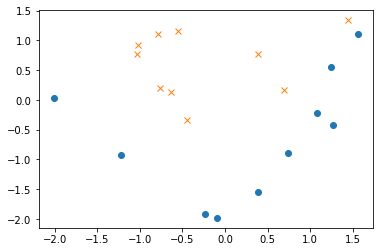

In [29]:
train = np.loadtxt('data3.csv', delimiter=',', skiprows=1)
train_x = train[:, 0:2]
train_y = train[:, 2]

theta = np.random.rand(4)

mu = train_x.mean(axis=0)
sigma = train_x.std(axis=0)

def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)
    
plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')



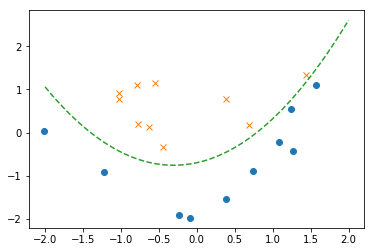

In [41]:
def to_matrix(x):
    x0 = np.ones([x.shape[0], 1])
    x3 = x[:, 0, np.newaxis] ** 2
    return np.hstack([x0, x, x3])

X = to_matrix(train_z)




# sigmoid
def f(x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))

ETA = 1e-3
epoch = 5000
for _ in range(epoch):
    theta = theta - ETA * np.dot(f(X) - train_y, X)

x1 = np.linspace(-2, 2, 100)
x2 =  -(theta[0] + theta[1] * x1 + theta[3] * x1 **2) / theta[2]
plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')

plt.plot(x1, x2, linestyle = 'dashed')

In [39]:
def classify(x):
    return (f(x) >= 0.5).astype(np.int)

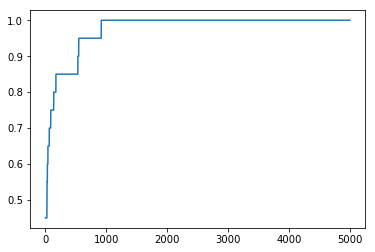

In [40]:
theta = np.random.rand(4)
accuracies = []
for _ in range(epoch):
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    result = classify(X) == train_y
    accuracy = len(result[result == True]) / len(result)
    accuracies.append(accuracy)
    
x = np.arange(len(accuracies))
plt.plot(x, accuracies)

## 4.2 ロジスティック回帰の確率的勾配降下法の実装

In [56]:
theta = np.random.rand(4)

def to_matrix(x):
    x0 = np.ones([x.shape[0], 1])
    x3 = x[:, 0, np.newaxis] ** 2
    return np.hstack([x0, x, x3])

X = to_matrix(train_z)




# sigmoid
def f(x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))

ETA = 1e-3
epoch = 5000


In [57]:
p = np.random.permutation(X.shape[0])
p

array([10,  0,  8, 18,  3,  7,  5, 15, 19,  6, 11,  9,  4, 12,  1, 17, 13,
       16, 14,  2])

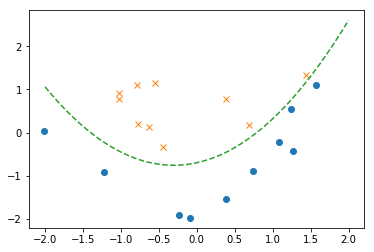

In [60]:
for _ in range(epoch):
    p = np.random.permutation(X.shape[0])
    for x, y in zip(X[p,:], train_y[p]):
        theta = theta - ETA * (f(x) - y) * x

x1 = np.linspace(-2, 2, 100)
x2 =  -(theta[0] + theta[1] * x1 + theta[3] * x1 **2) / theta[2]
plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')

plt.plot(x1, x2, linestyle = 'dashed')

# 5. 正則化

In [124]:
def g(x):
    return 0.1 * (x ** 3 + x **2 + x)

train_x = np.linspace(-2, 2, 8)
train_y = g(train_x) + 0.05 * np.random.randn(train_x.size)

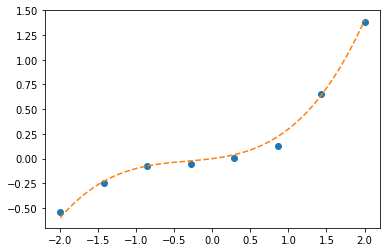

In [125]:
x = np.linspace(-2, 2, 100)
plt.plot(train_x, train_y, 'o')
plt.plot(x, g(x), linestyle='dashed')

In [126]:
mu = train_x.mean()
sigma = train_x.std()

def standardize(x):
    return (x - mu) / sigma

train_z = standardize(x)

In [127]:
def to_matrix(x):
    return  np.vstack([
        np.ones(x.size) ,
        x,
        x ** 2,
        x ** 3,
        x ** 4,
        x ** 5,
        x ** 6,
        x ** 7,
        x ** 8,
        x ** 9,
        x ** 10
    ]).T
X = to_matrix(train_z)
theta = np.random.randn(X.shape[1])

def f(x):
    return np.dot(x, theta)

## 5.2 正則化しない場合

## 5.3 正則化した場合

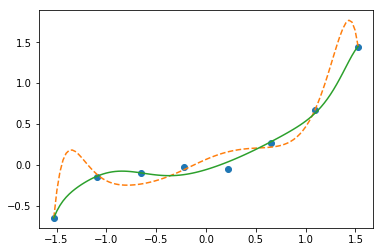

In [130]:
import numpy as np
import matplotlib.pyplot as plt

# 真の関数
def g(x):
    return 0.1 * (x ** 3 + x ** 2 + x)

# 真の関数にノイズを加えた学習データを適当な数だけ用意する
train_x = np.linspace(-2, 2, 8)
train_y = g(train_x) + np.random.randn(train_x.size) * 0.05

# 標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

# 学習データの行列を作る
def to_matrix(x):
    return np.vstack([
        np.ones(x.size),
        x,
        x ** 2,
        x ** 3,
        x ** 4,
        x ** 5,
        x ** 6,
        x ** 7,
        x ** 8,
        x ** 9,
        x ** 10
    ]).T

X = to_matrix(train_z)

# パラメータの初期化
theta = np.random.randn(X.shape[1])

# 予測関数
def f(x):
    return np.dot(x, theta)

# 目的関数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

# 正則化定数
LAMBDA = 0.5

# 学習率
ETA = 1e-4

# 誤差
diff = 1

# 正則化を適用せずに学習を繰り返す
error = E(X, train_y)
while diff > 1e-6:
    theta = theta - ETA * (np.dot(f(X) - train_y, X))

    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

theta1 = theta

# 正則化を適用して学習を繰り返す
theta = np.random.randn(X.shape[1])
diff = 1
error = E(X, train_y)
while diff > 1e-6:
    reg_term = LAMBDA * np.hstack([0, theta[1:]])
    theta = theta - ETA * (np.dot(f(X) - train_y, X) + reg_term)

    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

theta2 = theta

# プロットして確認
plt.plot(train_z, train_y, 'o')
z = standardize(np.linspace(-2, 2, 100))
theta = theta1 # 正則化なし
plt.plot(z, f(to_matrix(z)), linestyle='dashed')
theta = theta2 # 正則化あり
plt.plot(z, f(to_matrix(z)))
plt.show()
